In [1]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

# START

In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel

import numpy as np
import pandas as pd
from quetzal.io import display

SQLalchemy is not installed. No support for SQL output.


In [3]:
training_folder = '../../'

In [4]:
sm = stepmodel.read_zip(training_folder + 'model/{scen}/aon_pathfinder.zip'.format(scen=scenario))

read_hdf: 100%|████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.36it/s]


# generation
- Production = Population
- Attraction = Jobs

In [5]:
sm.zones['emission'] =  sm.zones['pop'].astype(int) / 10 # peak hour generation
sm.zones['attraction'] =  sm.zones['emp'].astype(int) / 10
sm.zones['pop'].sum()

2158238.2271273527

# car owners
car owners distribution is based on car times

In [6]:
motor_rate = 0.3
car = sm.copy()
car.zones['emission'] *= motor_rate

In [7]:
imp_matrix = car.car_los[
    ['origin', 'destination', 'time']
].set_index(['origin','destination']).unstack() 
imp_matrix = imp_matrix.replace(0, 120)

car.step_distribution(impedance_matrix=imp_matrix)

# PT captives
car owners distribution is based on car times

In [8]:
pt = sm.copy()
pt.zones['emission'] *= (1-motor_rate)

In [9]:
# Ici on prend comme fonction de coût le temps TC. Notez le .unstack() 
imp_matrix = pt.pt_los[
    ['origin', 'destination', 'gtime']
].set_index(['origin','destination']).unstack() 
imp_matrix = imp_matrix.replace(0, 120)

In [10]:
imp_matrix

gtime                                                      \
destination       zone_0       zone_1      zone_10     zone_100     zone_101   
origin                                                                         
zone_0        120.000000   663.093344  1468.498046  2261.324303  2476.514546   
zone_1        663.093344   120.000000  1649.087164  2169.843566  2470.032309   
zone_10      1468.498046  1709.087164   120.000000  2437.318123  3007.903449   
zone_100     2261.324303  2229.843566  2497.318123   120.000000  1858.567583   
zone_101     2476.514546  2470.032309  3037.903449  1779.414770   120.000000   
...                  ...          ...          ...          ...          ...   
zone_95      1933.869537  1927.387300  2439.863358  1620.527493  1100.800482   
zone_96      2429.049985  2397.569247  2665.043805  1090.553881  1555.853437   
zone_97      2211.689458  2205.207221  2736.025480   778.111845  1418.256013   
zone_98      2610.954080  2604.471843  3174.456947  1217.612035  1036.331061   
zone_99      2218.385365  2211.903127  2742.553065  1855.890506   992.156314   

                                                                              \
destination     zone_102     zone_103     zone_104     zone_105     zone_106   
origin                                                                         
zone_0       2417.006092  2502.561774  2390.925000  2235.231600  1977.594109   
zone_1       2410.523854  2411.081037  2017.518071  1841.618653  1971.111872   
zone_10      2922.999912  2678.555594  2566.918820  2411.225420  2603.587929   
zone_100     1932.777461  1533.326128  1031.689353   826.980322  2102.055936   
zone_101     2627.697846  1740.429708  2123.259047  2027.565647  2333.037212   
...                  ...          ...          ...          ...          ...   
zone_95      2239.657755  2391.452627  2005.218956  1883.973419  2408.936231   
zone_96      2009.431816   909.665229   834.802958  1065.757904  1946.274998   
zone_97      1875.819877  2057.753183  1580.669094  1397.109908  2045.098352   
zone_98      2382.541033  1434.693847  1427.460628  1724.614400  2027.301351   
zone_99      2542.347463  2098.203542  2079.734783  2094.353742  2690.811046   

             ...                                                      \
destination  ...      zone_90      zone_91      zone_92      zone_93   
origin       ...                                                       
zone_0       ...  2176.504315  2155.720802  2576.817341  2481.069223   
zone_1       ...  2170.022079  2129.914428  2483.330648  2455.262850   
zone_10      ...  2231.273554  1955.718716  2376.815256  2384.586481   
zone_100     ...  2305.939869  1717.138557  2452.225046  2211.731273   
zone_101     ...  2602.218699  2232.058943  1981.750350  1662.012283   
...          ...          ...          ...          ...          ...   
zone_95      ...  2101.430931  1724.018852  1794.641325  1024.903258   
zone_96      ...  2779.631928  2190.830616  2625.917106  2306.179038   
zone_97      ...  2068.982286  1480.180974  2215.267463  1697.187194   
zone_98      ...  2659.904706  2071.103395  2456.865514  2137.127447   
zone_99      ...  2108.584654  2026.708560  1801.795049  1032.056982   

                                                                              \
destination      zone_94      zone_95      zone_96      zone_97      zone_98   
origin                                                                         
zone_0       2022.529627  1933.869537  2369.049985  2211.689458  2811.707655   
zone_1       2016.047390  1927.387300  2277.569247  2205.207221  2759.473342   
zone_10      2648.523447  2559.863358  2545.043805  2766.025480  3077.701475   
zone_100     1267.948838  1800.527493  1090.553881   778.111845  1277.612035   
zone_101     1543.668285  1100.800482  1548.549236  1418.256013  1036.331061   
...                  ...          ...          ...          ...          ...   
zone_95       671.023277   120.000000  1984.9752

In [11]:
pt.step_distribution(impedance_matrix=imp_matrix)

In [12]:
pt.volumes

,origin,destination,volume
0,zone_0,zone_0,0.006895
1,zone_0,zone_1,0.252323
2,zone_0,zone_2,0.290493
3,zone_0,zone_3,0.415376
4,zone_0,zone_4,0.389355
...,...,...,...
12095,zone_109,zone_105,1.148844
12096,zone_109,zone_106,6.456632
12097,zone_109,zone_107,4.151848
12098,zone_109,zone_108,3.588932


# merge matrices

In [13]:
sm.volumes = pd.merge(
    car.volumes,
    pt.volumes,
    on=['origin', 'destination'],
    suffixes=[ '_car_owner', '_pt_captive']
).rename(columns={'volume_car_owner': 'car_owner', 'volume_pt_captive': 'pt_captive'})

# to_zip

In [14]:
sm.to_zip(
    training_folder + 'model/{scen}/distribution.zip'.format(scen=scenario), 
    only_attributes=['volumes', 'epsg', 'coordinates_unit']
)

to_hdf(new file): 100%|███████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 254.90it/s]


# monitoring

Text(0.5, 1.0, 'PT captives distribution')

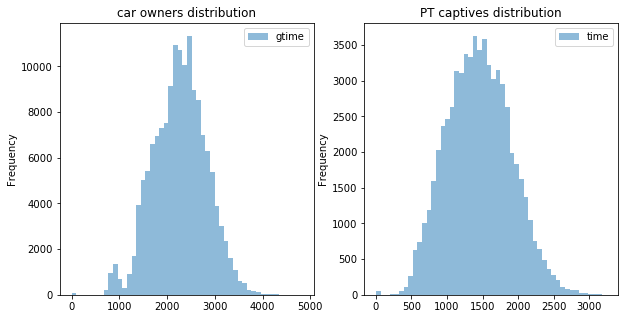

In [15]:
od = pd.merge(sm.volumes, sm.pt_los, on=['origin', 'destination'])
od = pd.merge(od, sm.car_los, on=['origin', 'destination'])
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=[10, 5])
plot = od[['gtime']].plot(kind='hist', weights=od['pt_captive'], bins=50, alpha=0.5, ax=axes[0])
plot.set_title('car owners distribution')
plot = od[['time']].plot(kind='hist', weights=od['car_owner'], bins=50, alpha=0.5, ax=axes[1])
plot.set_title('PT captives distribution')

# END